<a href="https://colab.research.google.com/github/KristianTonev/KristianTonev.github.io/blob/main/MachineL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Google Colab document, I use a dataset which looks at wine. There are 3 different classes (i.e. the different winemakers) and 13 dimensions (i.e. 13 features which are used to describe each wine, for example colour intensity or hue).

In total, the sample consists of 178 wines, which are split [59,71,48] between the three different winemakers.

For reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


In the code below, I first explore Classification, a supervised area of machine learning. Then, I explore Dimensionality Reduction, an unsupervised area of machine learning.

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

wine = datasets.load_wine()
X, y = wine.data, wine.target

knn = neighbors.KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

K nearest neighbors (kNN) is a simple learning strategy: given a new, unknown observation, look up in the reference database which ones have the closest features and assign the predominant class.


In [3]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [4]:
X.shape

(178, 13)

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
df=pd.DataFrame(X)
print(df.mean())

0      13.000618
1       2.336348
2       2.366517
3      19.494944
4      99.741573
5       2.295112
6       2.029270
7       0.361854
8       1.590899
9       5.058090
10      0.957449
11      2.611685
12    746.893258
dtype: float64


In [7]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X, y)
result = knn.predict([[13.00, 2.34, 2.37, 19.49, 99.74, 2.30, 2.03, 0.36, 1.59, 5.06, 0.96, 2.61, 746.89]])
print(result,wine.target_names[result])

[2] ['class_2']


Above, we see the average value for each of the 13 features used to describe the wines. These averages are then plugged into the knn model. This tells us that "class_2" (in other words the third winemaker) is most likely to make the average wine. Given that winemaker three has the smallest sub-sample out of the 178 sample size, this is an interesting result.

In [8]:
from sklearn.svm import SVC
my_svc_model=SVC()
my_svc_model.fit(X,y)
result = my_svc_model.predict([[13.00, 2.34, 2.37, 19.49, 99.74, 2.30, 2.03, 0.36, 1.59, 5.06, 0.96, 2.61, 746.89]]) #let's do the same prediction as with the knn!
print(result,wine.target_names[result])

my_svc_model2=SVC(probability=True)
my_svc_model2.fit(X,y)
my_svc_model2.predict_proba([[13.00, 2.34, 2.37, 19.49, 99.74, 2.30, 2.03, 0.36, 1.59, 5.06, 0.96, 2.61, 746.89]])


[2] ['class_2']


array([[0.17403016, 0.32659922, 0.49937061]])

Above, I replicate the classification analysis, but I use the SVC estimator (Support Vector Classifier) instead of knn.

This not only shows which winemaker is most likely to produce the average wine, but it also makes probabilistic predictions of how likely each winemaker is to make the average wine. (This probability changes each time the code is run, but, for example, above it shows a 49.9% chance it is winemaker three).

In [9]:
from sklearn import neighbors, datasets, linear_model
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_wine_knn():
    wine = datasets.load_wine()
    X = wine.data[:, 9:11]
                 
    y = wine.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=5) #Try changing the number of neighbors
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('color_intensity')
    pl.ylabel('hue')

    pl.axis('tight')

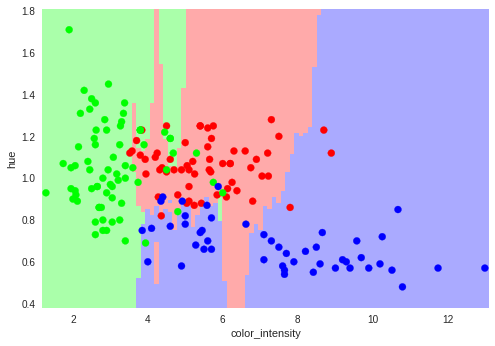

In [10]:
plot_wine_knn()

The shaded areas above are the predicted classes by the knn model, while the points are the actual classes of the data.

Winemaker one: Red,
 Winemaker two: Green,
 Winemaker three: Blue


When classifying wine by colour intensity and hue, the knn model appears to classify the wines fairly well. It seems that winemaker three makes wine which has the strongest colour intensity, while winemaker one makes wine which has the strongest hue.



**/// I now begin my task surrounding Dimensionality Reduction** /// 

In [11]:
X, y = wine.data, wine.target

from sklearn.decomposition import PCA #import the PCA model from the decomposition model collection. Same syntax as before, but we don't have a y.
pca = PCA(n_components=2) # Create PCA model. Need to specify number of components. We will use 2, in order to be able to plot them in 2D space.
pca.fit(X)
X_reduced = pca.transform(X) #Dimensionality reduction models have a special function called transform, where you transform the data into the new 2 dimensions.
print("Original dataset shape:",X.shape, "Reduced dataset shape:", X_reduced.shape)

Original dataset shape: (178, 13) Reduced dataset shape: (178, 2)


In [12]:
pca.components_ #the pca model has the property components_
# Naturally, since it create a mixture of all the input dimensions, each components has 13 terms. Then there are two components, with 13 terms each. 

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

In [13]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

PCA is simple, linear model, so we can even consturct the meaning of the 2 components
0.002 x alcohol + -0.001 x malic_acid + 0.000 x ash + -0.005 x alcalinity_of_ash + 0.018 x magnesium + 0.001 x total_phenols + 0.002 x flavanoids + -0.000 x nonflavanoid_phenols + 0.001 x proanthocyanins + 0.002 x color_intensity + 0.000 x hue + 0.001 x od280/od315_of_diluted_wines + 1.000 x proline
0.001 x alcohol + 0.002 x malic_acid + 0.005 x ash + 0.026 x alcalinity_of_ash + 0.999 x magnesium + 0.001 x total_phenols + -0.000 x flavanoids + -0.001 x nonflavanoid_phenols + 0.005 x proanthocyanins + 0.015 x color_intensity + -0.001 x hue + -0.003 x od280/od315_of_diluted_wines + -0.018 x proline


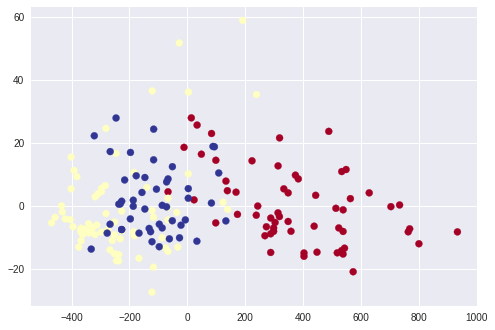

In [14]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("PCA is simple, linear model, so we can even consturct the meaning of the 2 components")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            wine.feature_names)))

In the above chart, we see that when the data is reduced into two dimensions,  the wines are seperated fairly well. I further the analysis by briefly diving into Clustering, where I show that there are 3 clearly defined centers to the data.

In [15]:
from sklearn.cluster import KMeans #same syntax, import the KMeans model from cluster model collection
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in Kmeans
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

In [16]:
y_pred=[int(str(i).replace('2','4').replace('1','2').replace('4','1')) for i in y_pred] #swap cluster indices for consistent coloring, only optical tuning

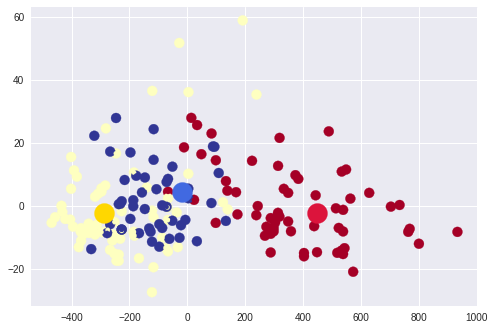

In [30]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=100, c=y,
           cmap='RdYlBu') #original classes, large dots

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=20, c=y_pred,
           cmap='RdYlBu') #original classes, smaller dots

colors=['royalBlue','crimson','gold']
for i,k in enumerate(k_means.cluster_centers_):
  plt.scatter(k[0],k[1], s=400, c=colors[i]) #cluster centers, huge dots

Lastly, I look at how many components are necessary to explain the majority of the variance in the dataset. This is important because if only a few components explain nearly all of the variance, the dimension of data can be reduced and it can take up less storage space, require less computation time, and the dataset itself will be less complex.

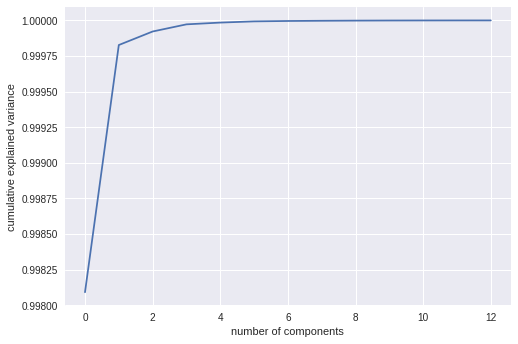

In [31]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The above chart shows we really only need 1-3 components out of the possible 13 features, to retain almost all of the variance between the different wines.